### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70301: Mercedes<br>
    3530203_70302: Ford <br>
    3530903_70101: BMW <br>
    3530903_70102: Audi <br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Применить доступные способы предобработки данных.
4. Попытаться обучить регрессию для предсказания цены автомобиля c наилучшим качеством. Качество оценивать по метрике RMSE на тестовой подвыборке. Попробовать различные модели регуляризации (и не только).

In [1306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [1307]:
auto_data = pd.read_csv("merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


# Exploring Data and Preprocessing Data

In [1308]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [1309]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000,13119.000,13119.000,13119.000,13119.000,13119.000
mean,2017.296,24698.597,21949.559,129.972,55.156,2.072
std,2.225,11842.676,21176.512,65.260,15.220,0.572
min,1970.000,650.000,1.000,0.000,1.100,0.000
25%,2016.000,17450.000,6097.500,125.000,45.600,1.800
50%,2018.000,22480.000,15189.000,145.000,56.500,2.000
75%,2019.000,28980.000,31779.500,145.000,64.200,2.100
max,2020.000,159999.000,259000.000,580.000,217.300,6.200


In [1310]:
auto_data.sort_values('mileage', ascending=True)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6129,E Class,2019,37995,Semi-Auto,1,Diesel,145,48.7,3.0
6126,C Class,2019,29995,Semi-Auto,1,Diesel,145,57.7,2.0
6127,C Class,2019,30995,Semi-Auto,1,Diesel,145,46.3,2.0
6128,C Class,2019,26995,Semi-Auto,1,Diesel,145,54.3,1.6
2883,A Class,2019,24480,Semi-Auto,9,Diesel,145,67.3,1.5
...,...,...,...,...,...,...,...,...,...
11928,E Class,2015,6775,Automatic,166086,Diesel,30,64.2,2.1
11382,C Class,2012,5250,Automatic,170000,Diesel,145,54.3,2.1
11581,CLK,2003,3495,Automatic,185000,Petrol,330,17.8,4.3
12904,A Class,2016,16249,Automatic,240494,Diesel,20,68.9,2.1


In [1311]:
auto_data.sort_values('mpg', ascending=True)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6970,A Class,2020,31500,Semi-Auto,1000,Hybrid,135,1.1,1.3
2524,A Class,2020,30231,Semi-Auto,4000,Hybrid,140,1.1,1.3
10366,A Class,2020,33900,Automatic,345,Hybrid,140,1.1,1.3
2560,A Class,2020,30231,Semi-Auto,4000,Hybrid,140,1.1,1.3
3978,G Class,2019,102502,Semi-Auto,8691,Diesel,150,11.0,3.0
...,...,...,...,...,...,...,...,...,...
7929,E Class,2019,38500,Semi-Auto,12422,Hybrid,135,188.3,2.0
11903,E Class,2019,38995,Automatic,2400,Hybrid,135,188.3,2.0
11419,E Class,2019,34995,Automatic,4129,Hybrid,140,201.8,2.0
6205,C Class,2019,34890,Semi-Auto,1139,Hybrid,135,217.3,2.0


**У модели A class mpg не может быть равен 1.1, поэтому удалим их из датасета**

In [1312]:
auto_data.loc[:,['mpg']] = auto_data['mpg'].replace(to_replace=[1.1],value=np.NaN)
auto_data.dropna(how='any', axis=0, inplace=True)

Значение mpg = 217 не выглядит, как выброс

In [1313]:
df = auto_data.model.isin(['A Class'])
auto_data[df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


**Не работает. Почему?**

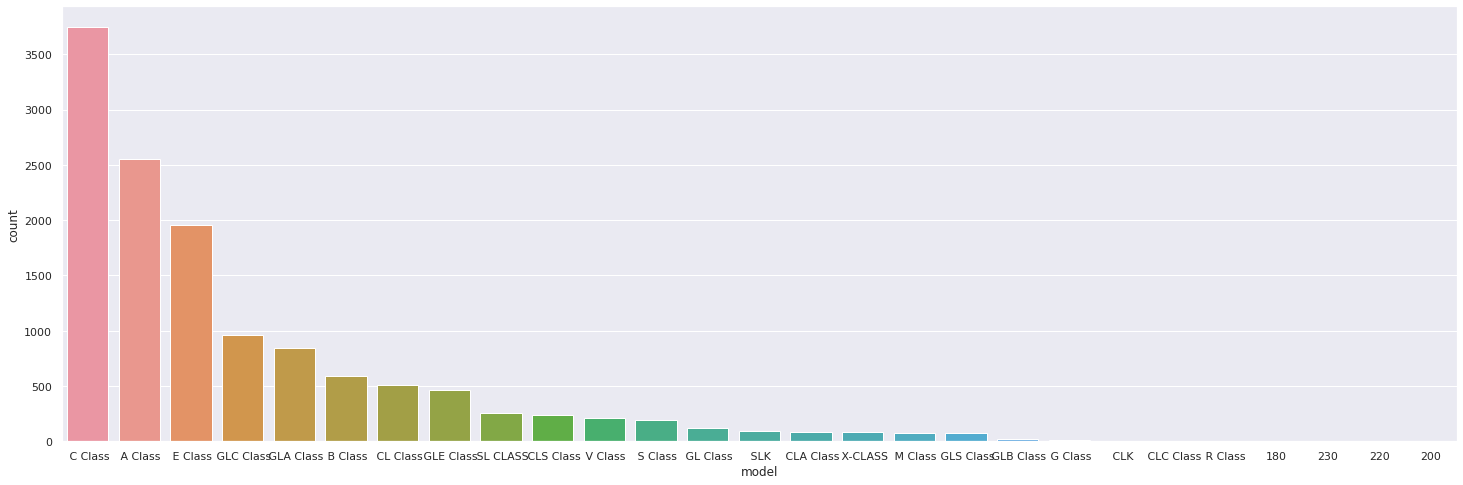

In [1314]:

plt.figure(figsize=(25,8))
sns.countplot(x = 'model',
              data = auto_data,
              order = auto_data['model'].value_counts().index)

plt.show()

**Проверим на null значения**

In [1315]:
auto_data.isnull().sum()

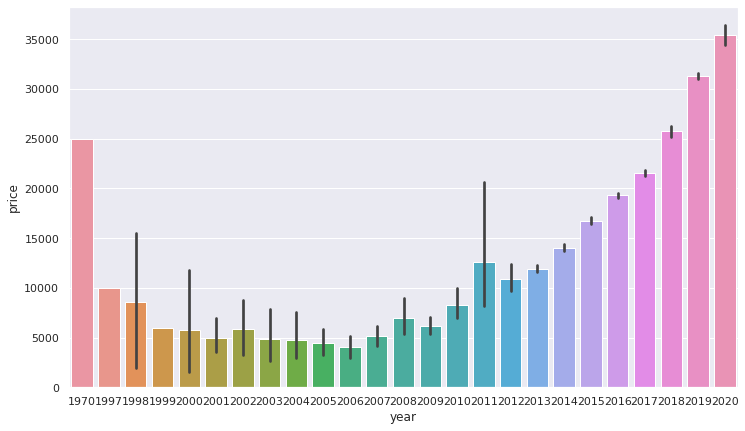

In [1316]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,7))
sns.barplot(x=auto_data['year'], y=auto_data['price'])

In [1317]:
year_1970_df = auto_data['year'] == 1970
auto_data[year_1970_df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12072,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0


Уберем 1970 год со слишком высокой ценой из датафрейма, так как он может испортить модель

In [1318]:
auto_data.drop(labels = [12072],axis = 0, inplace=True)

In [1319]:
auto_data.sort_values(by='price', ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
...,...,...,...,...,...,...,...,...,...
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0


In [1320]:
auto_data.sort_values(by='price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
...,...,...,...,...,...,...,...,...,...
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0


Price 650 выглядит как выброс, лучше выбросить

In [1321]:
auto_data.drop(labels = [11816],axis = 0, inplace=True)

In [1322]:
auto_data.sort_values(by='price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
11174,S Class,2001,1695,Automatic,108800,Diesel,325,31.7,3.2
...,...,...,...,...,...,...,...,...,...
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0


**Заменим год выпуска автомобиля на ее возраст**

In [1323]:
auto_data['year'] = 2020-auto_data['year']

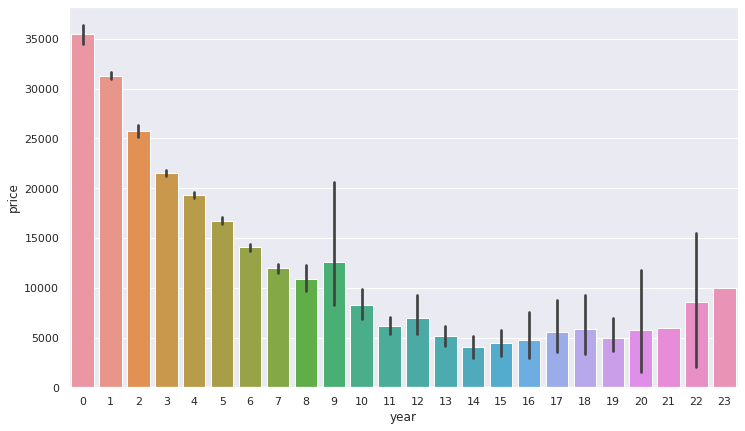

In [1324]:
plt.subplots(figsize=(12,7))
sns.barplot(x=auto_data['year'], y=auto_data['price'])

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



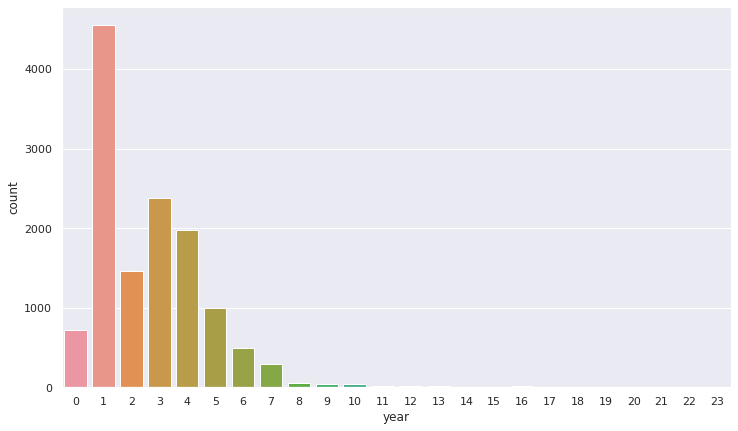

In [1325]:
plt.subplots(figsize=(12,7))
sns.countplot(auto_data['year'])

In [1326]:
df = auto_data.year == 9
auto_data[df].sort_values(by = 'price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
56,A Class,9,3440,Manual,74000,Diesel,150,54.3,2.0
55,B Class,9,3990,Automatic,90000,Petrol,240,40.9,1.5
9491,B Class,9,4295,Automatic,61400,Diesel,200,47.1,2.0
11592,A Class,9,4995,Automatic,70000,Petrol,240,42.8,1.7
11433,A Class,9,5195,Automatic,60000,Diesel,165,52.3,2.0
9479,E Class,9,5495,Automatic,138000,Diesel,150,53.3,2.1
11076,A Class,9,5499,Automatic,52235,Petrol,205,41.5,1.5
63,E Class,9,5740,Manual,115000,Diesel,160,52.3,2.1
11927,B Class,9,6595,Automatic,34000,Petrol,240,39.8,1.5
11381,C Class,9,6995,Automatic,120899,Petrol,200,40.4,1.8


Похоже на правду

In [1327]:
df = auto_data.year == 22
auto_data[df].sort_values(by = 'price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11764,SLK,22,1990,Automatic,99300,Petrol,265,32.1,2.3
11808,SLK,22,1990,Automatic,113557,Petrol,265,32.1,2.3
11860,SL CLASS,22,10450,Automatic,49000,Petrol,255,28.2,3.2
11794,S Class,22,19990,Automatic,43534,Petrol,265,23.3,6.0


SLK 1998 года за 1990, почему так дешево?

In [1328]:
#auto_data.drop(labels = [11764],axis = 0, inplace=True)
#auto_data.drop(labels = [11808],axis = 0, inplace=True)

In [1329]:
df = auto_data.year == 20
auto_data[df].sort_values(by = 'price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11765,SLK,20,1490,Automatic,87000,Petrol,265,27.2,3.2
11791,SLK,20,3990,Automatic,113237,Petrol,270,27.2,3.2
13036,SL CLASS,20,11750,Automatic,68709,Petrol,270,24.6,3.2


Еще лучше 2000 года с большим объемом двигателя и меньшим пробегом за 1490

In [1330]:
auto_data.corr(method='spearman')["price"].sort_values(ascending=False)

In [1331]:
auto_data_engineSize0 = auto_data['engineSize'].isin([0])
auto_data[auto_data_engineSize0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9618,A Class,4,17500,Automatic,29712,Diesel,20,68.9,0.0
9619,A Class,2,20500,Automatic,13386,Petrol,145,53.3,0.0
9621,A Class,2,18000,Automatic,18347,Diesel,150,65.7,0.0
9650,GLA Class,4,18700,Other,30895,Other,125,56.5,0.0
9654,A Class,4,17800,Automatic,21913,Diesel,20,68.9,0.0
10675,SL CLASS,4,16500,Automatic,26955,Diesel,30,70.6,0.0
10710,A Class,2,17500,Automatic,19796,Diesel,145,74.3,0.0
10739,GLA Class,3,16000,Manual,34635,Diesel,30,64.2,0.0
10815,A Class,3,18000,Automatic,33282,Diesel,145,68.9,0.0
11183,E Class,2,22738,Automatic,24000,Diesel,150,61.4,0.0


https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/discussion/209170 - engineSize = 0 - для электромобилей (ответ автора датасета)

In [1332]:
import plotly.express as px
model_count= auto_data
ax2= px.treemap(model_count,path=["model"],title="Popularity of the bought car models:")
ax2.show()

Unsupported

**Проверим датасет на дубликаты и удалим их**

In [1333]:
duplicated_df = auto_data.duplicated(keep = False)
auto_data[duplicated_df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
468,V Class,2,19998,Manual,27222,Diesel,145,46.3,2.1
469,V Class,4,17998,Manual,21981,Diesel,200,46.3,2.1
493,V Class,2,19998,Manual,27222,Diesel,145,46.3,2.1
494,V Class,4,17998,Manual,21981,Diesel,200,46.3,2.1
1327,GLB Class,0,35400,Semi-Auto,2000,Diesel,145,46.3,2.0
...,...,...,...,...,...,...,...,...,...
11742,E Class,4,17990,Automatic,39000,Diesel,30,65.7,2.0
12798,A Class,0,26590,Automatic,2563,Petrol,145,53.3,1.3
12799,B Class,0,27490,Automatic,2563,Diesel,145,55.4,2.0
12800,B Class,0,27490,Automatic,2563,Diesel,145,55.4,2.0


In [1334]:
auto_data=auto_data.drop_duplicates(keep="first")

In [1335]:
duplicated_df = auto_data.duplicated(keep = False)
auto_data[duplicated_df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


**Проверим номинальные признаки**

In [1336]:
auto_data.model.value_counts()

180, 200,220, 230 - это цифровые индексы, обозначающие объем двигателя, а не модель

In [1337]:
df = auto_data.model.isin(['200','180','220','230'])
auto_data[df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10463,180,6,10799,Manual,39240,Diesel,20,72.4,1.5
11347,230,13,4500,Automatic,94000,Petrol,520,29.4,0.0
11995,220,2,19995,Automatic,9814,Diesel,145,61.4,2.0
11996,200,2,19495,Manual,15113,Diesel,145,64.2,2.2


более того, действительности они не соотвествуют<br>
что с ними делать?

In [1338]:
auto_data.loc[:,['model']] = auto_data['model'].replace(to_replace=['200','180','220','230'],value=np.NaN)
auto_data.dropna(how='any', axis=0, inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/python/envs/default/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



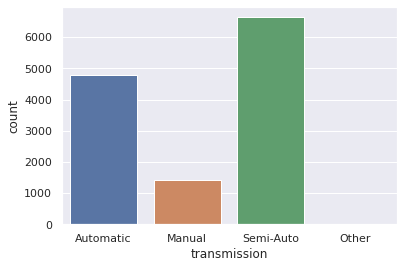

In [1339]:
sns.countplot(auto_data["transmission"])

In [1340]:
auto_data['transmission'].value_counts()

In [1341]:
auto_data.loc[:,['transmission']] = auto_data['transmission'].replace(to_replace=['Other'],value=np.NaN)
auto_data.dropna(how='any', axis=0, inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/python/envs/default/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



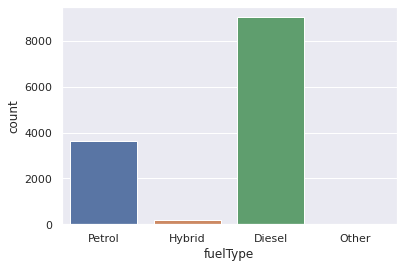

In [1342]:
sns.countplot(auto_data["fuelType"])

In [1343]:
auto_data['fuelType'].value_counts()

Можно подумать, что other относится к электроавтомобилям, но engineSize равно 0 только у одной модели

In [1344]:
df = auto_data.fuelType=='Other'
auto_data[df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11740,GLE Class,4,31990,Automatic,46000,Other,0,76.4,3.0
12095,C Class,4,13850,Automatic,77814,Other,0,134.5,2.0
12184,C Class,3,17400,Automatic,52897,Other,0,134.5,2.0
12270,C Class,3,16000,Automatic,54011,Other,0,134.5,2.0
12389,C Class,5,15000,Automatic,53400,Other,0,134.5,2.0
12894,C Class,0,40999,Automatic,400,Other,135,217.3,2.0


**Спросим эксперта**<br>

какие бывают виды топлива для авто<br>
кроме дизеля, бензина?
<br>
Семён 19:42<br>
Для авто только это<br>
Керосин - самолеты и ракеты<br>

*Мнение эксперта*<br>
*Поэтому выкинем их*

In [1345]:
auto_data.loc[:,['fuelType']] = auto_data['fuelType'].replace(to_replace=['Other'],value=np.NaN)
auto_data.dropna(how='any', axis=0, inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/python/envs/default/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1346]:
df = auto_data.fuelType=='Other'
auto_data[df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


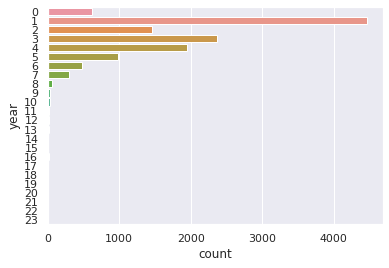

In [1347]:
sns.countplot(y = auto_data["year"])

sns.pairplot(auto_data)

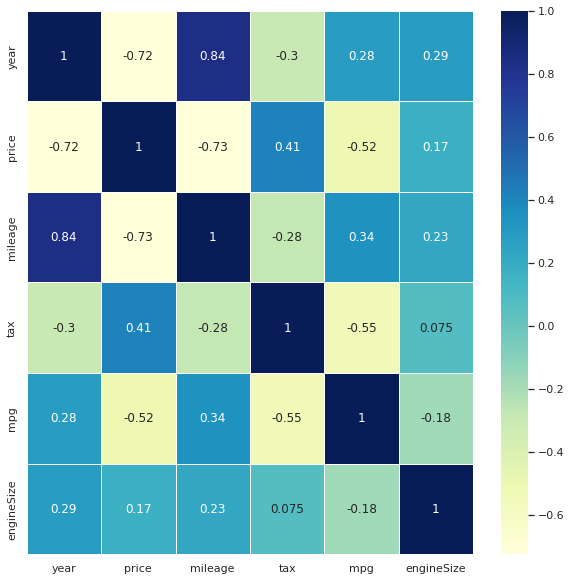

In [1348]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax, cmap="YlGnBu" )

Год и пробег с примерно одинаковой силой влияют на цену автомобиля. Прямая и обратная зависимость соответственно<br>
Налог в UK зависит от выбросов CO2 в воздух. Чем больше расход топлива, тем больше выброс. **<br>Почему тогда корреляция негативная?**

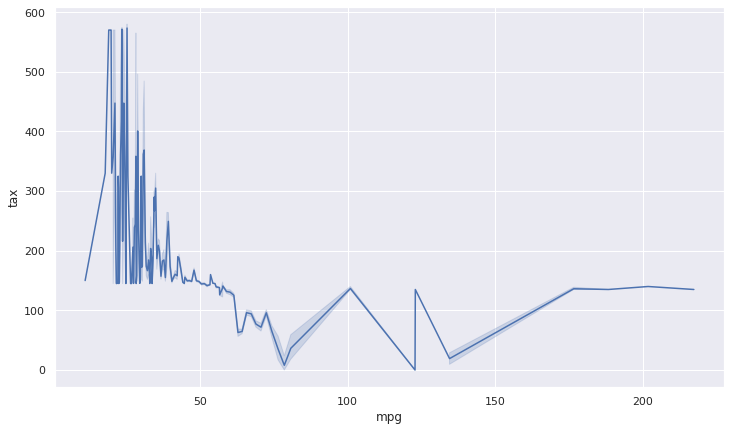

In [1349]:
plt.subplots(figsize=(12,7))
sns.lineplot(data=auto_data, x="mpg", y="tax")

In [1350]:
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,15,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,3,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,4,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,4,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,4,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,0,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,0,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,1,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,1,37990,Automatic,2426,Diesel,145,45.6,2.0


**Закодируем строковые поля числовыми значениями**

***Как лучше закодировать? Label Encoder, dummy, OHE, frequency encoding***

In [1351]:
from sklearn.preprocessing import LabelEncoder
auto_data_label_encoder =  auto_data.copy(deep=True)

label_encoder = LabelEncoder()
label_encoder.fit(auto_data_label_encoder['model'])
label_encoder.transform(auto_data_label_encoder['model'])
auto_data_label_encoder['model'] = label_encoder.transform(auto_data_label_encoder['model'])

In [1352]:
label_encoder = LabelEncoder()
label_encoder.fit(auto_data_label_encoder['transmission'])
label_encoder.transform(auto_data_label_encoder['transmission'])
auto_data_label_encoder['transmission'] = label_encoder.transform(auto_data_label_encoder['transmission'])

In [1353]:
label_encoder = LabelEncoder()
label_encoder.fit(auto_data_label_encoder['fuelType'])
label_encoder.transform(auto_data_label_encoder['fuelType'])
auto_data_label_encoder['fuelType'] = label_encoder.transform(auto_data_label_encoder['fuelType'])
auto_data_label_encoder

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,20,15,5200,0,63000,2,325,32.1,1.8
1,18,3,34948,0,27000,1,20,61.4,2.1
2,19,4,49948,0,6200,2,555,28.0,5.5
3,9,4,61948,0,16000,2,325,30.4,4.0
4,9,4,73948,0,4000,2,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,2,0,35999,0,500,0,145,55.4,2.0
13115,1,0,24699,0,2500,0,145,55.4,2.0
13116,13,1,30999,0,11612,0,145,41.5,2.1
13117,7,1,37990,0,2426,0,145,45.6,2.0


In [1354]:
auto_data_label_encoder.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,20,15,5200,0,63000,2,325,32.1,1.8
1,18,3,34948,0,27000,1,20,61.4,2.1
2,19,4,49948,0,6200,2,555,28.0,5.5
3,9,4,61948,0,16000,2,325,30.4,4.0
4,9,4,73948,0,4000,2,325,30.1,4.0


In [1355]:
auto_data_label_encoder.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,12843.000,12843.000,12843.000,12843.000,12843.000,12843.000,12843.000,12843.000,12843.000
mean,5.814,2.726,24642.330,1.144,22149.022,0.581,129.845,55.173,2.076
std,5.864,2.182,11874.821,0.932,21050.396,0.901,65.451,15.031,0.573
min,0.000,0.000,1350.000,0.000,1.000,0.000,0.000,11.000,0.000
25%,2.000,1.000,17330.000,0.000,6490.000,0.000,125.000,45.600,1.800
50%,2.000,2.000,22299.000,2.000,15446.000,0.000,145.000,56.500,2.000
75%,10.000,4.000,28966.000,2.000,31986.500,2.000,145.000,64.200,2.100
max,22.000,23.000,159999.000,2.000,259000.000,2.000,580.000,217.300,6.200


# Train test split

In [1356]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [1357]:
X, Y = auto_data_label_encoder.drop(['price'], axis=1), auto_data_label_encoder['price']

In [1358]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, shuffle=True)

In [1359]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

# Линейная регрессия

In [1360]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)
simple_LR_MSE

37165969.62186882

In [1361]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared=False)
print('RMSE LinearRegression', simple_LR_RMSE) 

RMSE LinearRegression 6096.389884338831


стандартное отклонение

In [1362]:
Y_test.std()

11485.588262047015

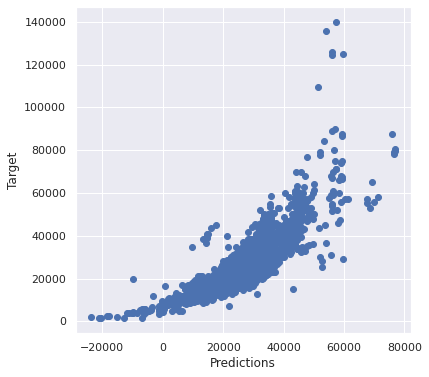

In [1363]:
plt.figure(figsize=(6, 6))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

Судя по графику получилось не очень

In [1364]:
simple_LR.intercept_, simple_LR.coef_

(24650.758175750838,
 array([ 1439.195, -5084.252,   -58.714, -2552.274,   902.813, -1084.542,
        -1847.691,  6346.513]))

In [1365]:
pd.DataFrame(simple_LR.coef_, auto_data_label_encoder.columns[1:], columns=['Coefficients'])

,Coefficients
year,1439.195
price,-5084.252
transmission,-58.714
mileage,-2552.274
fuelType,902.813
tax,-1084.542
mpg,-1847.691
engineSize,6346.513


# Применим регуляризацию

In [1366]:
lasso_model = Lasso()

lasso_model.fit(X_train_scaled, Y_train)
predictions = lasso_model.predict(X_test_scaled)
metrics.mean_squared_error(Y_test, predictions, squared=False)


6096.322200378303

In [1367]:
pd.DataFrame(lasso_model.coef_, auto_data_label_encoder.columns[1:], columns=['Coefficients'])

,Coefficients
year,1437.922
price,-5083.638
transmission,-57.395
mileage,-2551.435
fuelType,901.426
tax,-1081.824
mpg,-1846.953
engineSize,6345.255


In [1368]:
lasso_model = LassoCV(random_state=10)

lasso_model.fit(X_train_scaled, Y_train)
predictions = lasso_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)


6095.756485345488

Невероятно, но почти ничего не изменилось

In [1369]:
pd.DataFrame(lasso_model.coef_, auto_data_label_encoder.columns[1:], columns=['Coefficients'])

,Coefficients
year,1425.898
price,-5077.055
transmission,-44.988
mileage,-2544.106
fuelType,888.310
tax,-1056.184
mpg,-1840.006
engineSize,6333.299


In [1370]:
ridge_model = Ridge()

ridge_model.fit(X_train_scaled, Y_train)
predictions = ridge_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)


6096.336823769836

In [1371]:
pd.DataFrame(ridge_model.coef_, auto_data_label_encoder.columns[1:], columns=['Coefficients'])

,Coefficients
year,1439.245
price,-5083.303
transmission,-58.604
mileage,-2552.585
fuelType,902.614
tax,-1084.069
mpg,-1847.719
engineSize,6345.497


In [1372]:
ridge_model = RidgeCV()

ridge_model.fit(X_train_scaled, Y_train)
predictions = ridge_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)


6095.86886073795

In [1373]:
pd.DataFrame(ridge_model.coef_, auto_data_label_encoder.columns[1:], columns=['Coefficients'])

,Coefficients
year,1439.691
price,-5074.790
transmission,-57.619
mileage,-2555.362
fuelType,900.825
tax,-1079.819
mpg,-1847.968
engineSize,6336.371


In [1374]:
alphas = np.linspace(1, 10, 20)
alphas

In [1375]:
lasso_model = LassoCV(random_state = 10, alphas=alphas)

lasso_model.fit(X_train_scaled, Y_train)
predictions = lasso_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)

6095.7800851710945

In [1376]:

pd.DataFrame(lasso_model.coef_, auto_data_label_encoder.columns[1:], columns=['Coefficients'])

,Coefficients
year,1426.470
price,-5077.394
transmission,-45.575
mileage,-2544.432
fuelType,888.934
tax,-1057.396
mpg,-1840.332
engineSize,6333.867


# Random Forest Regressor

In [1377]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(random_state = 10, n_estimators = 100)

rfr_model.fit(X_train_scaled, Y_train)
predictions = rfr_model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(rfr_model.feature_importances_, X.columns, 
             columns=['Importance']).sort_values('Importance')

RMSE = 2588.171


,Importance
fuelType,0.003
transmission,0.004
tax,0.018
model,0.110
year,0.187
mileage,0.196
mpg,0.203
engineSize,0.279


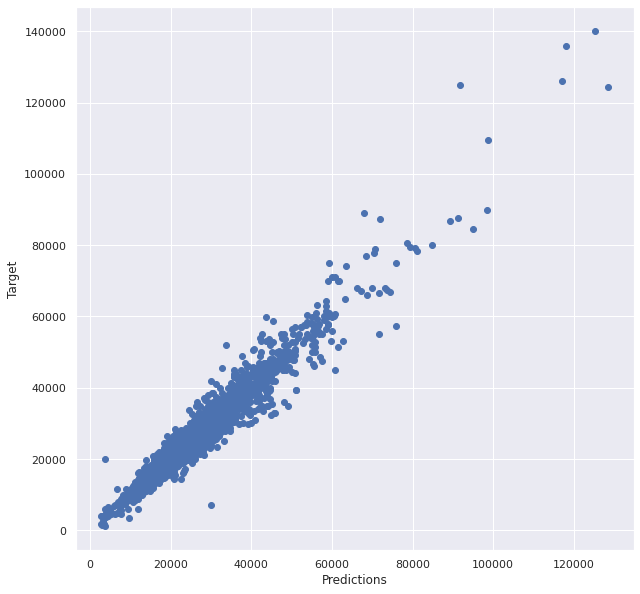

In [1378]:
plt.figure(figsize=(10, 10))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

**Сравним разные модели**

In [1379]:
def regression_model(model):
    regressor = model
    regressor.fit(X_train_scaled, Y_train)

    score = regressor.score(X_test_scaled, Y_test)
    return regressor, score

In [1380]:

model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
alphas = (1, 10, 20)
models_to_evaluate = [LinearRegression(), Ridge(), RidgeCV(alphas), Lasso(), LassoCV(), RandomForestRegressor(random_state = 10, n_estimators = 100)]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.718
1,Linear,Ridge(),0.718
2,Linear,"RidgeCV(alphas=array([ 1, 10, 20]))",0.718
3,Linear,Lasso(),0.718
4,Linear,LassoCV(),0.718
5,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.949


**Если не применять перемешивание при разделении данных на тестовые и тренировочные, результат значительно хуже**

In [1381]:
rfr_model.fit(X_train_scaled, Y_train)
score = rfr_model.score(X_test_scaled, Y_test)
score

0.9492083512164644

# Модель без номинальных признаков

In [1382]:
auto_data_no_nominal_cols = auto_data_label_encoder.drop(['transmission','fuelType'], axis=1, inplace=False)

*если убрать model, будет совсем плохо*

In [1383]:
auto_data_no_nominal_cols.head()

,model,year,price,mileage,tax,mpg,engineSize
0,20,15,5200,63000,325,32.1,1.8
1,18,3,34948,27000,20,61.4,2.1
2,19,4,49948,6200,555,28.0,5.5
3,9,4,61948,16000,325,30.4,4.0
4,9,4,73948,4000,325,30.1,4.0


In [1384]:
X, Y = auto_data_no_nominal_cols.drop(['price'], axis=1), auto_data_no_nominal_cols['price']

In [1385]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, shuffle=True)

In [1386]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

In [1387]:

rfr_model = RandomForestRegressor(random_state = 10, n_estimators = 100)

rfr_model.fit(X_train_scaled, Y_train)
predictions = rfr_model.predict(X_test_scaled)

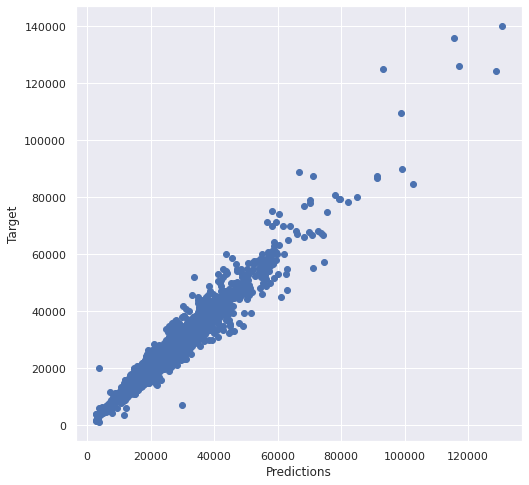

In [1388]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [1389]:
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 2640.255


это ни к чему хорошему не привело, что и требовалось доказать

# Dummy Encoding

In [1390]:

auto_data_dummy = pd.concat([auto_data.drop(['fuelType','transmission','model'], axis =1, inplace=False),
                       pd.get_dummies(auto_data[['fuelType','transmission','model']])],axis=1)
auto_data_dummy

,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,transmission_Automatic,...,model_ GLC Class,model_ GLE Class,model_ GLS Class,model_ M Class,model_ R Class,model_ S Class,model_ SL CLASS,model_ SLK,model_ V Class,model_ X-CLASS
0,15,5200,63000,325,32.1,1.8,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,3,34948,27000,20,61.4,2.1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,4,49948,6200,555,28.0,5.5,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,4,61948,16000,325,30.4,4.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,73948,4000,325,30.1,4.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,0,35999,500,145,55.4,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13115,0,24699,2500,145,55.4,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13116,1,30999,11612,145,41.5,2.1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
13117,1,37990,2426,145,45.6,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1391]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']

In [1392]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, shuffle=True)

In [1393]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled


In [1394]:
def regression_model(model):
    regressor = model
    regressor.fit(X_train_scaled, Y_train)

    score = regressor.score(X_test_scaled, Y_test)
    predictions = regressor.predict(X_test_scaled)
    RMSE = metrics.mean_squared_error(Y_test, predictions, squared=False)
    return regressor, score, RMSE

In [1395]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
alphas = (1, 10, 20)
models_to_evaluate = [LinearRegression(), Ridge(), RidgeCV(alphas), Lasso(), LassoCV(), RandomForestRegressor()]

for model in models_to_evaluate:
    regressor, score, RMSE = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score, "RMSE": RMSE}, ignore_index=True)

model_performance

,Features,Model,Score,RMSE
0,Linear,LinearRegression(),0.783,5349.070
1,Linear,Ridge(),0.783,5349.068
2,Linear,"RidgeCV(alphas=array([ 1, 10, 20]))",0.783,5348.225
3,Linear,Lasso(),0.783,5349.330
4,Linear,LassoCV(),0.783,5352.133
5,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.953,2493.547


In [1396]:
rfr_model = RandomForestRegressor(random_state = 10, n_estimators = 100)

rfr_model.fit(X_train_scaled, Y_train)
predictions = rfr_model.predict(X_test_scaled)

In [1397]:
print('RMSE:', metrics.mean_squared_error(Y_test, predictions, squared=False))

RMSE: 2482.2328808323646


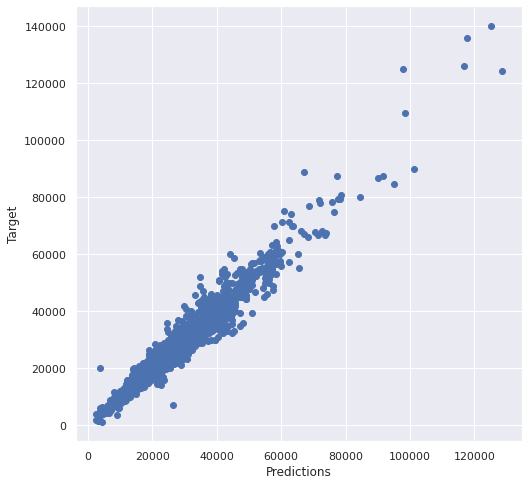

In [1398]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [1399]:
pd.DataFrame(rfr_model.feature_importances_, X.columns, 
             columns=['Importance']).sort_values('Importance')

,Importance
model_ R Class,1.297e-07
model_ CLC Class,5.409e-07
model_ CLK,2.920e-06
model_ GLB Class,2.547e-05
model_ SLK,7.908e-05
model_ GL Class,1.556e-04
model_ X-CLASS,1.811e-04
model_ M Class,1.937e-04
model_ CLA Class,2.701e-04
fuelType_Hybrid,4.665e-04
